## Se importan las librerías a utilizar

In [58]:
import os
import pandas as pd
import numpy as np
import pickle
import joblib

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

# machine learning
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import (RandomForestRegressor, AdaBoostRegressor,
                             GradientBoostingRegressor, ExtraTreesRegressor)

from sklearn.model_selection import (GridSearchCV, cross_val_score,
                                    StratifiedKFold)

ruta_actual = os.getcwd()
## Funciones
os.chdir('../')  # Establecemos el directorio de trabajo
from utils import funciones as fn
from utils import listas as ls
os.chdir(ruta_actual)

In [59]:
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

## Cargamos el csv con los datos ya limpios y analizados en el EDA

In [60]:
ruta_data_clean = f'../data/clean/df_coches_clean.csv'
df = pd.read_csv(ruta_data_clean,index_col=0)
df

,Precio,Combustible,Anyo,Kilometros,Potencia,Vendedor_profesional,Comunidad_Autonoma,Cluster_Marca,Cluster_Modelo
0,950,Diésel,2000.0,227000,111.923077,False,Navarra,Standard,sedan_pequeno
1,6200,Gasolina,2017.0,50071,82.000000,True,Canarias,Standard,compacto_pequeno
2,7851,Diésel,2016.0,103000,100.000000,True,Catalunya,Standard,otro
3,19426,Diésel,2014.0,120000,140.000000,True,Navarra,Mid_Premium,furgon_pasajero
4,22850,Diésel,2017.0,107000,130.000000,True,Andalucía,Standard,furgon_trabajo
...,...,...,...,...,...,...,...,...,...
49731,18590,Diésel,2019.0,21153,115.000000,True,Comunidad_de_Madrid,Standard,compacto_grande
49732,18490,Gasolina,2018.0,47000,140.000000,True,Andalucía,Standard,compacto_grande
49733,14500,Diésel,2015.0,68750,150.000000,True,Andalucía,Standard,sedan_grande
49734,11000,Gasolina,2019.0,21422,72.000000,True,Andalucía,Standard,otro


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41989 entries, 0 to 49736
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Precio                41989 non-null  int64  
 1   Combustible           41989 non-null  object 
 2   Anyo                  41989 non-null  float64
 3   Kilometros            41989 non-null  int64  
 4   Potencia              41989 non-null  float64
 5   Vendedor_profesional  41989 non-null  bool   
 6   Comunidad_Autonoma    41989 non-null  object 
 7   Cluster_Marca         41989 non-null  object 
 8   Cluster_Modelo        41989 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(4)
memory usage: 2.9+ MB


## Una vez que ya tenemos los datos clasificados, podemos hacer variables dummies a las variables categoricas

In [62]:
df = pd.get_dummies(df, columns=['Combustible','Cluster_Marca','Cluster_Modelo','Vendedor_profesional'], prefix=['Combustible','Cluster_Marca','Cluster_Modelo','Vendedor_profesional'])

In [63]:
df

,Precio,Anyo,Kilometros,Potencia,Comunidad_Autonoma,Combustible_Diésel,Combustible_Eléctrico,Combustible_Gas licuado (GLP),Combustible_Gas natural (CNG),Combustible_Gasolina,...,Cluster_Modelo_coupe_pequeno,Cluster_Modelo_furgon_pasajero,Cluster_Modelo_furgon_trabajo,Cluster_Modelo_otro,Cluster_Modelo_sedan_grande,Cluster_Modelo_sedan_pequeno,Cluster_Modelo_sub_grande,Cluster_Modelo_sub_pequeno,Vendedor_profesional_False,Vendedor_profesional_True
0,950,2000.0,227000,111.923077,Navarra,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,6200,2017.0,50071,82.000000,Canarias,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,7851,2016.0,103000,100.000000,Catalunya,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,19426,2014.0,120000,140.000000,Navarra,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,22850,2017.0,107000,130.000000,Andalucía,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49731,18590,2019.0,21153,115.000000,Comunidad_de_Madrid,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
49732,18490,2018.0,47000,140.000000,Andalucía,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
49733,14500,2015.0,68750,150.000000,Andalucía,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
49734,11000,2019.0,21422,72.000000,Andalucía,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1


### El modelo va a predecir el precio por comunidad autonoma, para simplificar el modelo, se seleccionan las 7 comunidades con más vehículos a la venta.

### Se hará de 2 maneras:
* Entrenando un modelo con todos los datos y luego prediciendo por cada comunidad
* Entrenando y prediciendo un modelo por cada una de las comunidades seleccionadas

# Modelo

## Primero se va a evaluar el modelo entrenado con todos los datos

In [64]:
Train_df, Test_df = train_test_split(df, test_size=0.2)

In [65]:
Train_df

,Precio,Anyo,Kilometros,Potencia,Comunidad_Autonoma,Combustible_Diésel,Combustible_Eléctrico,Combustible_Gas licuado (GLP),Combustible_Gas natural (CNG),Combustible_Gasolina,...,Cluster_Modelo_coupe_pequeno,Cluster_Modelo_furgon_pasajero,Cluster_Modelo_furgon_trabajo,Cluster_Modelo_otro,Cluster_Modelo_sedan_grande,Cluster_Modelo_sedan_pequeno,Cluster_Modelo_sub_grande,Cluster_Modelo_sub_pequeno,Vendedor_profesional_False,Vendedor_profesional_True
22165,1900,2003.0,280,124.084639,Galicia,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
14313,19250,2018.0,21118,115.000000,Comunidad_Valenciana,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
2343,8990,2016.0,129000,110.000000,Navarra,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13223,10590,2018.0,69298,75.000000,Comunidad_de_Madrid,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
17405,19990,2017.0,134370,150.000000,Comunidad_de_Madrid,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10756,4990,2013.0,120000,75.000000,Catalunya,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
30297,1600,1999.0,291000,140.048780,Principado_de_Asturias,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
9084,1150,2005.0,250000,108.679012,Comunidad_Valenciana,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4580,21500,2018.0,18000,136.000000,Andalucía,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [95]:
X = Train_df.drop(columns=['Precio'])
y = Train_df[['Precio','Comunidad_Autonoma']]

### Se entrena y se aplica minmaxscaler sobre los valores del train

In [67]:
MINMAX = MinMaxScaler()
MINMAX.fit_transform(X.drop(columns=['Comunidad_Autonoma']))
MINMAX.feature_names_in_

array(['Anyo', 'Kilometros', 'Potencia', 'Combustible_Diésel',
       'Combustible_Eléctrico', 'Combustible_Gas licuado (GLP)',
       'Combustible_Gas natural (CNG)', 'Combustible_Gasolina',
       'Combustible_Híbrido', 'Combustible_Híbrido enchufable',
       'Cluster_Marca_Low_Cost', 'Cluster_Marca_Mid_Premium',
       'Cluster_Marca_Premium', 'Cluster_Marca_Standard',
       'Cluster_Modelo_compacto_grande',
       'Cluster_Modelo_compacto_pequeno', 'Cluster_Modelo_coupe_grande',
       'Cluster_Modelo_coupe_pequeno', 'Cluster_Modelo_furgon_pasajero',
       'Cluster_Modelo_furgon_trabajo', 'Cluster_Modelo_otro',
       'Cluster_Modelo_sedan_grande', 'Cluster_Modelo_sedan_pequeno',
       'Cluster_Modelo_sub_grande', 'Cluster_Modelo_sub_pequeno',
       'Vendedor_profesional_False', 'Vendedor_profesional_True'],
      dtype=object)

In [68]:
X[MINMAX.feature_names_in_]=MINMAX.fit_transform(X.drop(columns=['Comunidad_Autonoma']))

           MAE        STD           MODELOS
3 -1541.546578  15.819474          AdaBoost
1 -1569.331088  12.539533           XGBoost
5 -1573.500083  12.949173      RandomForest
6 -1575.157685  16.852675        ExtraTrees
2 -1694.437659  24.399873       KNeighboors
8 -1827.436555  15.088562  GradientBoosting
4 -1996.056635  23.771773      DecisionTree
0 -2856.277001  29.549956            Linear
7 -6387.803119  56.948902               SVR


<AxesSubplot:title={'center':'CV MAE'}, xlabel='MAE', ylabel='MODELOS'>

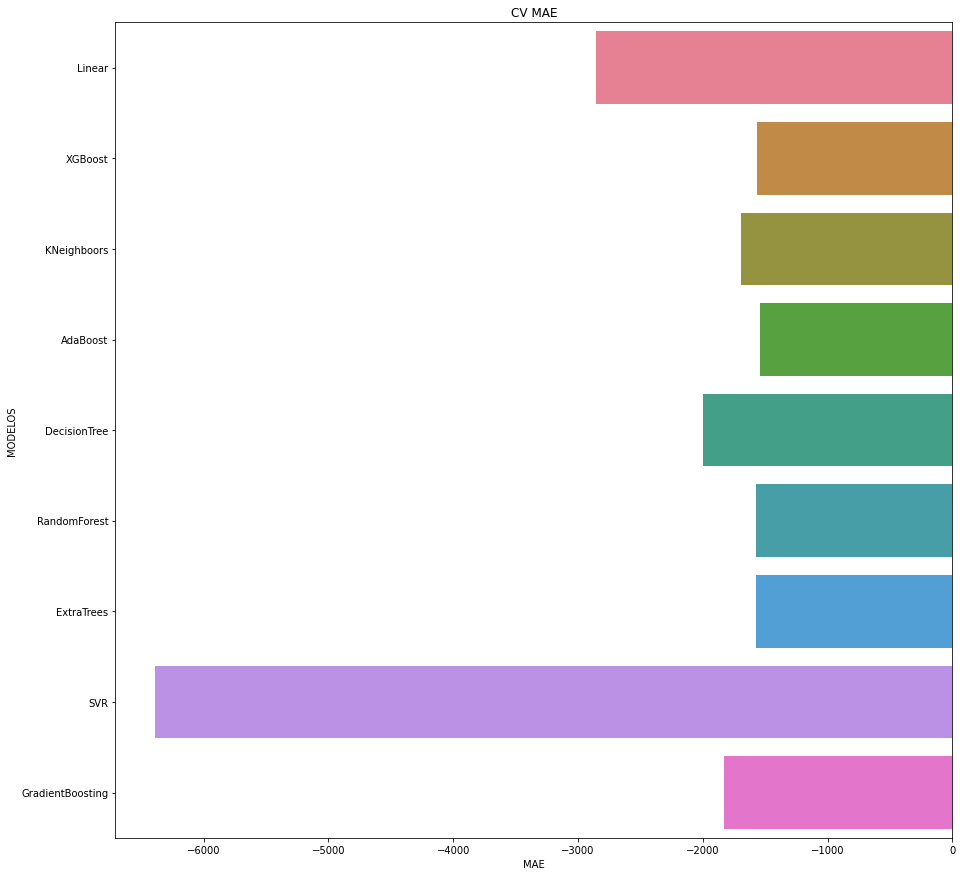

In [69]:
K_fold = StratifiedKFold(n_splits=10)

resultados_cv_MAE = [] # resultado cross validation 
media_cv_MAE = [] # valor de la media de cross validation
std_cv = [] # std cross validation 


for model in ls.lista_modelos :
    resultados_cv_MAE.append(cross_val_score(model, X.drop(
        columns=['Comunidad_Autonoma']), y.drop(
            columns=['Comunidad_Autonoma']), 
            scoring = "neg_mean_absolute_error", cv = K_fold, n_jobs=-1))

for resultado in resultados_cv_MAE:
    media_cv_MAE.append(resultado.mean())
    std_cv.append(resultado.std())

tabla_resultados = pd.DataFrame(
    {
        "MAE":media_cv_MAE,
        "STD": std_cv,
        "MODELOS":[
                     "Linear",
                     "XGBoost",
                     "KNeighboors",
                     "AdaBoost", 
                     "DecisionTree",   
                     "RandomForest",
                     "ExtraTrees",
                     "SVR",
                     "GradientBoosting"]
    },columns=['MAE','STD','MODELOS'])

print(tabla_resultados.sort_values(by=['MAE'], ascending=False))
plt.figure(figsize=(15,15), facecolor='w')
plt.xlabel("Mean Absolute Error")
plt.title("CV MAE")
sns.barplot("MAE","MODELOS", data = tabla_resultados,
                palette="husl", orient = "h")

### Una vez obtenida la metrica MAE de cada modelo, se evaluan los 3 mejores modelos en el resto de metricas (RMSE, MSE, MAPE)

In [80]:
modelos_elec=[]
for i in tabla_resultados.sort_values(by=['MAE'], ascending=False)['MODELOS'][:3].index:
    modelos_elec.append(ls.lista_modelos[i])

In [81]:
modelos_elec[0].fit(X.drop(columns=['Comunidad_Autonoma']),y.drop(columns=['Comunidad_Autonoma']))

AdaBoostRegressor(base_estimator=DecisionTreeRegressor())

In [82]:
modelos_elec[1].fit(X.drop(columns=['Comunidad_Autonoma']),y.drop(columns=['Comunidad_Autonoma']))

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [83]:
modelos_elec[2].fit(X.drop(columns=['Comunidad_Autonoma']),y.drop(columns=['Comunidad_Autonoma']))

C:\Users\saula\AppData\Local\Temp\ipykernel_6908\2631895003.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelos_elec[2].fit(X.drop(columns=['Comunidad_Autonoma']),y.drop(columns=['Comunidad_Autonoma']))


RandomForestRegressor()

In [84]:
nombre_modelos = [tabla_resultados.sort_values(by=['MAE'], ascending=False)['MODELOS'][:3].values]

In [85]:
X_test = Test_df.drop(columns=['Precio'])
y_test = Test_df[['Precio','Comunidad_Autonoma']]

In [86]:
X_test[MINMAX.feature_names_in_]=MINMAX.fit_transform(X_test.drop(columns=['Comunidad_Autonoma']))

In [87]:
modelos_elec

[AdaBoostRegressor(base_estimator=DecisionTreeRegressor()),
 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
              reg_lambda=1, ...),
 RandomForestRegressor()]

In [88]:
nombre_modelos

[array(['AdaBoost', 'XGBoost', 'RandomForest'], dtype=object)]

In [89]:
tabla_metricas = pd.DataFrame()
for comunidad in ls.lista_comunidades:
    for idx,modelo in enumerate(modelos_elec):
        y_pred = modelo.predict(X_test[X_test.Comunidad_Autonoma == comunidad].drop(columns=['Comunidad_Autonoma']))
        tabla_metricas = tabla_metricas.append({
            'MAE' : mean_absolute_error(y_test[y_test.Comunidad_Autonoma == comunidad]['Precio'],y_pred),
            'MSE' : mean_squared_error(y_test[y_test.Comunidad_Autonoma == comunidad]['Precio'],y_pred),
            'RMSE': np.sqrt(mean_squared_error(y_test[y_test.Comunidad_Autonoma == comunidad]['Precio'],y_pred)),
            'MAPE': mean_absolute_percentage_error(y_test[y_test.Comunidad_Autonoma == comunidad]['Precio'],y_pred),
            'MODELO': nombre_modelos[0][idx],
            'Comunidad_Autonoma':comunidad
        },ignore_index=True)


In [90]:
tabla_metricas

,MAE,MSE,RMSE,MAPE,MODELO,Comunidad_Autonoma
0,1682.190968,6.572667e+06,2563.721238,0.172501,AdaBoost,Comunidad_de_Madrid
1,1753.556076,6.570179e+06,2563.236046,0.178247,XGBoost,Comunidad_de_Madrid
2,1804.031281,7.183054e+06,2680.122050,0.182454,RandomForest,Comunidad_de_Madrid
3,1508.738609,5.758642e+06,2399.717077,0.209808,AdaBoost,Andalucía
4,1596.840759,5.719243e+06,2391.493892,0.213114,XGBoost,Andalucía
5,1613.768554,6.046334e+06,2458.929438,0.215843,RandomForest,Andalucía
6,1659.623045,7.329889e+06,2707.376735,0.188001,AdaBoost,Catalunya
7,1657.864630,6.998267e+06,2645.423743,0.186236,XGBoost,Catalunya
8,1715.129363,7.326257e+06,2706.705956,0.190950,RandomForest,Catalunya
9,1515.174183,5.186938e+06,2277.484951,0.173060,AdaBoost,Comunidad_Valenciana


In [93]:
pickle.dump(modelos_elec[0], open('../model/modelo_ABR.pkl', 'wb'))
pickle.dump(modelos_elec[0], open('../model/modelo_XGB.pkl', 'wb'))
pickle.dump(modelos_elec[0], open('../model/modelo_RF.pkl', 'wb'))

## Ahora se realiza la evaluación creando un modelo distinto para cada una de las comunidades Autonomas

In [96]:
# Cross validate model with Kfold stratified cross val
K_fold = StratifiedKFold(n_splits=10)


# Modeling step Test differents algorithms 
MINMAX_COM = MinMaxScaler()


for i in ls.lista_comunidades:
    
    MINMAX_COM.fit_transform(X[X.Comunidad_Autonoma==i].drop(
        columns=['Comunidad_Autonoma']))
    X[X.Comunidad_Autonoma==i][MINMAX_COM.feature_names_in_]=MINMAX_COM.fit_transform(
        X[X.Comunidad_Autonoma==i].drop(columns=['Comunidad_Autonoma']))
    resultados_cv_MAE_com = [] # resultado cross validation 
    media_cv_MAE_com = [] # valor de la media de cross validation
    std_cv_com = [] # std cross validation

    for modelo in ls.lista_modelos :
        resultados_cv_MAE_com.append(cross_val_score(modelo, X[
            X.Comunidad_Autonoma==i].drop(
                columns=['Comunidad_Autonoma']),
                y[y.Comunidad_Autonoma==i].drop(
                    columns=['Comunidad_Autonoma']),
                    scoring = "neg_mean_absolute_error",
                    cv = K_fold, n_jobs=-1));

    for resultado in resultados_cv_MAE_com:
        media_cv_MAE_com.append(resultado.mean());
        std_cv_com.append(resultado.std());

    tabla_resultados_com = pd.DataFrame(
        {
            "MAE":media_cv_MAE_com,
            "STD": std_cv_com,
            "MODELOS":[
                        "Linear",
                        "XGBoost",
                        "KNeighboors",
                        "AdaBoost", 
                        "DecisionTree",   
                        "RandomForest",
                        "ExtraTrees",
                        "SVR",
                        "GradientBoosting"]
        }, columns=['MAE','STD','MODELOS'])

    print(f'{i}')
    print(tabla_resultados_com.sort_values(by=['MAE'], ascending=False))
    print('*'*50)

Comunidad_de_Madrid
           MAE         STD           MODELOS
6 -1710.414658   45.344161        ExtraTrees
1 -1719.045768   45.906986           XGBoost
5 -1735.375602   49.463367      RandomForest
3 -1750.498528   47.299960          AdaBoost
8 -1871.714027   53.492594  GradientBoosting
4 -2386.880886   76.732599      DecisionTree
0 -2846.034218   55.175450            Linear
2 -4217.411833  118.257649       KNeighboors
7 -6523.664954  139.776084               SVR
**************************************************
Andalucía
           MAE         STD           MODELOS
1 -1624.880536   72.925592           XGBoost
3 -1661.434557   73.331846          AdaBoost
6 -1687.758748   71.774426        ExtraTrees
5 -1698.367315   94.172696      RandomForest
8 -1762.327472  104.529587  GradientBoosting
4 -2259.318139  110.701186      DecisionTree
0 -2656.318179  106.997198            Linear
2 -4380.546042  160.871384       KNeighboors
7 -6304.259218  131.427718               SVR
*******************